# Combinação de Classificadores

#### Simulação com Scikit-Learn

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_classification
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [19]:
np.random.seed(123456)
X1, Y1 = make_classification(n_features=4, n_redundant=0, n_informative=4, n_clusters_per_class=1, n_classes=4, n_samples=400)
#X1, Y1 = make_blobs(n_features=4, centers=4, n_samples=200)
#X1, Y1 = make_gaussian_quantiles(n_features=4, n_classes=4, n_samples=200)

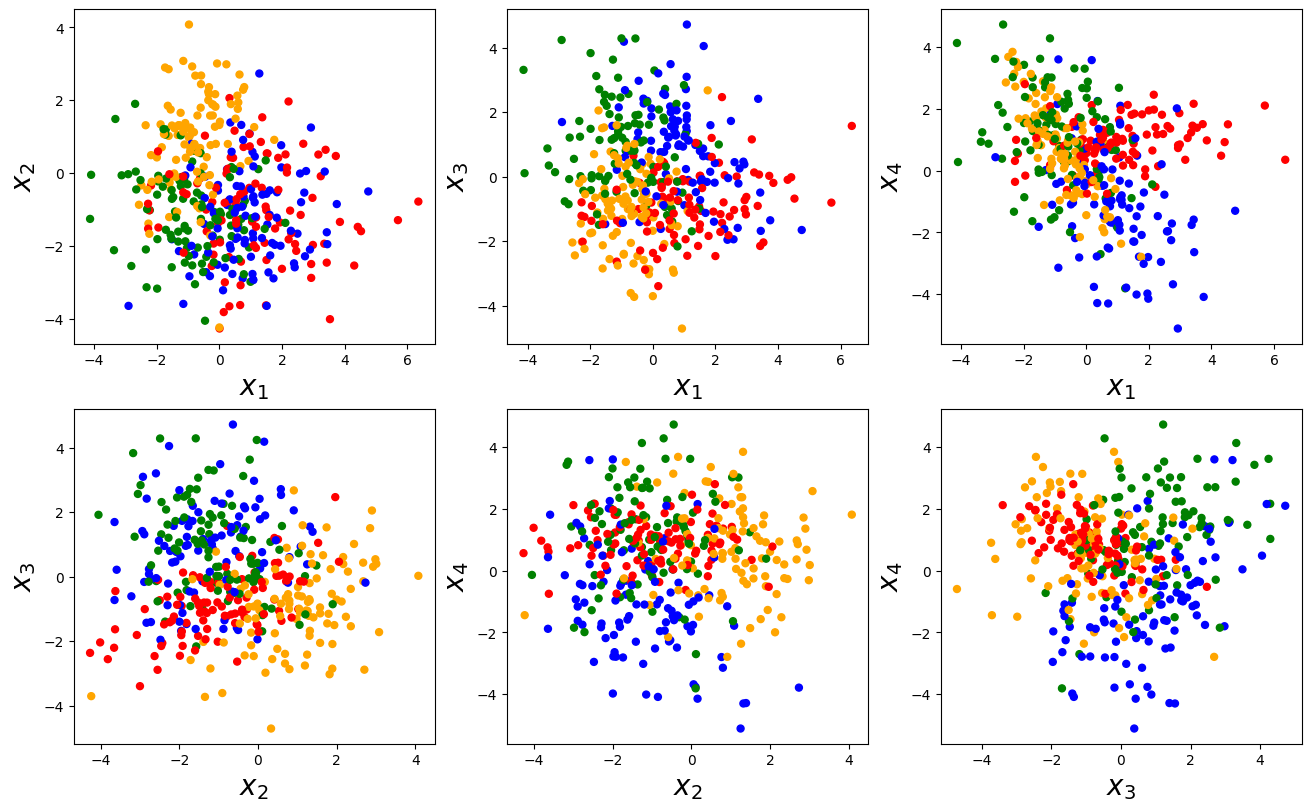

In [20]:
path_out = 'Data/scatterMat_dados.png'

coll = ['red','blue','green','orange']; vecCol = []
for i in Y1: vecCol.append(coll[i]) 
    
FS = (13,8)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

#Subgráfico (1,1)
ax = fig.add_subplot(spec[0, 0])
ax.scatter(X1[:, 0], X1[:, 1], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)

#Subgráfico (1,2)
ax = fig.add_subplot(spec[0, 1])
plt.scatter(X1[:, 0], X1[:, 2], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_3$', fontsize=20)

#Subgráfico (1,3)
ax = fig.add_subplot(spec[0, 2])
plt.scatter(X1[:, 0], X1[:, 3], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_4$', fontsize=20)

#Subgráfico (2,1)
ax = fig.add_subplot(spec[1, 0])
plt.scatter(X1[:, 1], X1[:, 2], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_2$', fontsize=20); ax.set_ylabel('$x_3$', fontsize=20)

#Subgráfico (2,2)
ax = fig.add_subplot(spec[1, 1])
plt.scatter(X1[:, 1], X1[:, 3], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_2$', fontsize=20); ax.set_ylabel('$x_4$', fontsize=20)

#Subgráfico (2,3)
ax = fig.add_subplot(spec[1, 2])
plt.scatter(X1[:, 2], X1[:, 3], marker='o', c=vecCol, s=25) # type: ignore
ax.set_xlabel('$x_3$', fontsize=20); ax.set_ylabel('$x_4$', fontsize=20)

plt.savefig(path_out,dpi=300)
plt.show()

In [21]:
path_out = "Data/dados.txt"

f= open(path_out,"w")
for i in range(0,Y1.size):
    st = str(Y1[i]+1)
    for j in range(0,X1.shape[1]):
        st += ','+ str(X1[i,j])
    st += '\n'
    f.write(st)
f.close()

In [22]:
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack((data, np.asarray(row).astype(float))) # type: ignore
            except:
                data = np.asarray(row).astype(float)
    f.close()
    y = data[:,0] # type: ignore
    x = data[:,1:] # type: ignore
    return y,x

In [23]:
path = 'Data/dados.txt'
y,x_ = read_class_data(path)

escalonador = preprocessing.MinMaxScaler()
x = escalonador.fit_transform(x_)

### Separação aleatória dos dados para treinamento e avaliação

In [24]:
percentAvalia = 0.33

#A ordenação dos valores aleatórios segundo seu índice/argumento
#O resultado é uma nova ordem aleatória (mais conveniente para este caso)
posAleatorias = np.argsort(np.random.uniform(0,1, y.shape[0]))

#Subconjunto de avaliação
yI = y[posAleatorias[0: np.int64(np.ceil(y.shape[0]*percentAvalia))]]
xI = x[posAleatorias[0: np.int64(np.ceil(y.shape[0]*percentAvalia))], :]

#Subconjunto de treino
yD = y[posAleatorias[np.int64(np.floor(y.shape[0]*percentAvalia)):-1]]
xD = x[posAleatorias[np.int64(np.floor(y.shape[0]*percentAvalia)):-1], :]

### Visualizacão dos dados de treino/avaliação

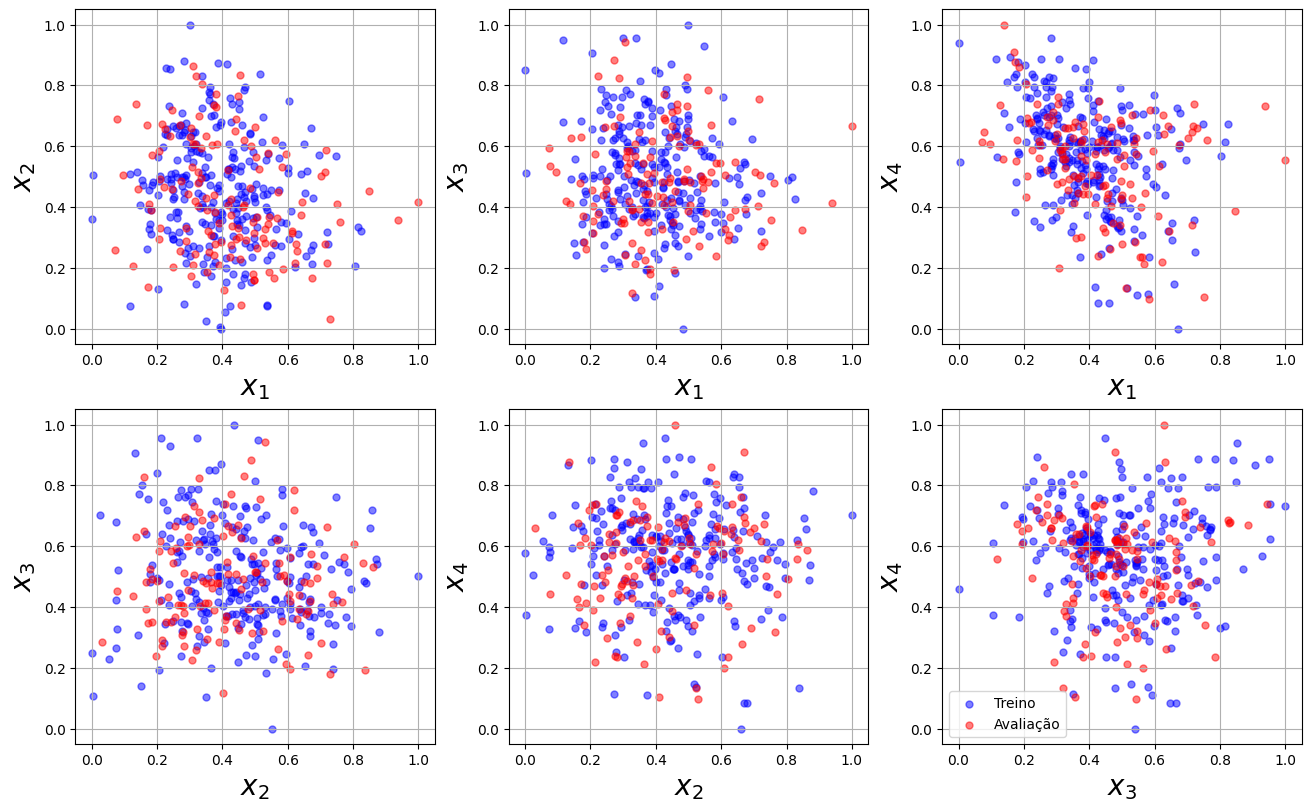

In [25]:
FS = (13,8)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
contaComb = 0
combAtribs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
nomeEixos = ['$x_1$','$x_2$','$x_3$','$x_4$']

for i in range(0,2):
    for j in range(0,3):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(xD[:, combAtribs[contaComb][0]], xD[:, combAtribs[contaComb][1]], marker='o', c='blue', s=25, alpha=0.5, label='Treino') # type: ignore
        ax.scatter(xI[:, combAtribs[contaComb][0]], xI[:, combAtribs[contaComb][1]], marker='o', c='red', s=25,alpha=0.5, label='Avaliação') # type: ignore
        ax.set_xlabel(nomeEixos[combAtribs[contaComb][0]], fontsize=20)
        ax.set_ylabel(nomeEixos[combAtribs[contaComb][1]], fontsize=20)
        ax.grid(True)
        contaComb += 1

ax.legend(fontsize=10) # type: ignore
ax = ax # type: ignore

## SVM/CART

### Classificações de referência ("baselines")
* SVM com Kernel {Linear, RBF} (C=100, gamma=0.5, OVR)
* CART com min_samples_split= {2,10}

In [26]:
G = []
G.append( DecisionTreeClassifier(min_samples_split=2,criterion='entropy',min_impurity_decrease=10**(-5),random_state=1) )
G.append( DecisionTreeClassifier(min_samples_split=10,criterion='entropy',min_impurity_decrease=10**(-5),random_state=1) )
G.append( SVC(kernel='linear', C=100, probability=True) )
G.append( SVC(kernel='rbf', C=100, gamma=0.5, probability=True) )

nomeModelo = ['CART+Psi2 ','CART+Psi10','SVM+Linear','SVM+RBF   ']
for i in range(0,4):
    G[i].fit(xD,yD)
    yEst = G[i].predict(xI)
    avalia = np.count_nonzero(yEst == yI) / yI.shape[0]
    print(nomeModelo[i]+' --- ', avalia)

CART+Psi2  ---  0.6363636363636364
CART+Psi10 ---  0.6515151515151515
SVM+Linear ---  0.7348484848484849
SVM+RBF    ---  0.7575757575757576


### Votação por Maioria

In [27]:
g1 = DecisionTreeClassifier(min_samples_split=2,criterion='entropy',min_impurity_decrease=10**(-5),random_state=1)
g2 = DecisionTreeClassifier(min_samples_split=10,criterion='entropy',min_impurity_decrease=10**(-5),random_state=1)
g3 = SVC(kernel='linear', C=100, probability=True)
g4 = SVC(kernel='rbf', C=100, gamma=0.5, probability=True)
modelos = [('dt1', g1),('dt2', g2),('svc1', g3),('svc2', g4)]

hardVote = VotingClassifier(estimators=modelos,voting='hard')

hardVote.fit(xD, yD)

yEst_hardVote = hardVote.predict(xI)

avalia = np.count_nonzero(yEst_hardVote == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.7121212121212122


### Regras derivadas de Bayes (Regra da Soma)

In [28]:
g1 = DecisionTreeClassifier(max_depth=4)
g2 = DecisionTreeClassifier(max_depth=8)
g3 = SVC(kernel='linear', C=100, probability=True)
g4 = SVC(kernel='rbf', C=100, gamma=0.5, probability=True)
modelos = [('dt1', g1),('dt2', g2),('svc1', g3),('svc2', g4)]

softVote = VotingClassifier(estimators=modelos,voting='soft', weights=[1, 1, 1, 1])

softVote.fit(xD, yD)

yEst_softVote = softVote.predict(xI)

avalia = np.count_nonzero(yEst_softVote == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.696969696969697


## Bagging

In [29]:
modelo = SVC(C=100, kernel='rbf',gamma=0.5)
bag = BaggingClassifier(base_estimator= modelo, n_estimators=20, random_state=0)

bag.fit(xD,yD)

yEst_bag = bag.predict(xI)

avalia = np.count_nonzero(yEst_bag == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.7651515151515151


## AdaBoost/SAMME

In [30]:
modelo = SVC(C=100, kernel='rbf',gamma=0.5,probability=True)
combClass = AdaBoostClassifier(modelo,n_estimators=10)

combClass.fit(xD, yD)

yEst = combClass.predict(xI)

avalia = np.count_nonzero(yEst == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.6666666666666666


## Random Forest

In [31]:
combClass = RandomForestClassifier(n_estimators=2500, criterion='entropy', 
                                   min_samples_split=10, min_impurity_decrease=10**(-7),random_state=1)

combClass.fit(xD, yD)

yEst = combClass.predict(xI)

avalia = np.count_nonzero(yEst == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.7121212121212122


## Stacking

In [32]:
g1 = DecisionTreeClassifier(max_depth=4)
g2 = DecisionTreeClassifier(max_depth=8)
g3 = SVC(kernel='linear', C=100, probability=True)
g4 = SVC(kernel='rbf', C=100, gamma=0.5, probability=True)
estimadores = [('dt1', g1),('dt2', g2),('svc1', g3),('svc2', g4)]

combClass = StackingClassifier(estimators=estimadores, final_estimator=SVC(kernel='rbf', C=100, gamma=0.5) )

combClass.fit(xD, yD)

yEst = combClass.predict(xI)

avalia = np.count_nonzero(yEst == yI) / yI.shape[0]
print('Acurácia: ', avalia)

Acurácia:  0.7196969696969697


### Comparação segundo o número de modelos na combinação
* Usar diferentes conjuntos para treinar e avaliar
* Considerar a média das avaliações (mais robusta) como valor de referência/comparação

In [33]:
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=10, min_impurity_decrease=10**(-5), random_state=0)
AB_SVM = AdaBoostClassifier(SVC(C=100, kernel='rbf',gamma=0.5,probability=True), n_estimators=100, random_state=0)
AB_CART = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,criterion='entropy',min_impurity_decrease=10**(-5),random_state=1), n_estimators=100, random_state=0)
SVC = SVC(C=100, kernel='rbf',gamma=0.5,probability=True)

n_estimadores = [2, 4, 8, 16, 32, 64, 128, 256, 512]
acuraciasAdaBoost_SVM = []
acuraciasAdaBoost_CART = []
acuraciasRandomForest = []
acuraciasSVM = []
n_avalia = 5
percentAvalia = 0.33
N = y.shape[0]

for estims in n_estimadores:
    RF.set_params(n_estimators=estims)
    AB_SVM.set_params(n_estimators=estims)
    AB_CART.set_params(n_estimators=estims)
    accRF, accAB_SVM, accAB_CART, accSVM = 0, 0, 0, 0
    
    for k in range(0,n_avalia):
        #Sortetio e divisão...
        posAleatorias = np.argsort(np.random.uniform(0,1, y.shape[0] ))
        
        yI = y[ posAleatorias[0: np.int64(np.ceil(N*percentAvalia)) ] ]
        xI = x[ posAleatorias[0: np.int64(np.ceil(N*percentAvalia)) ] , :]
        
        yD = y[ posAleatorias[np.int64(np.floor(N*percentAvalia)):-1] ]
        xD = x[ posAleatorias[np.int64(np.floor(N*percentAvalia)):-1] , :]
        
        RF.fit(xD,yD)
        AB_SVM.fit(xD,yD)
        AB_CART.fit(xD,yD)
        SVC.fit(xD,yD)

        yPred_RF = RF.predict(xI)
        yPred_AB_SVM = AB_SVM.predict(xI)
        yPred_AB_CART = AB_CART.predict(xI)
        yPred_SVM = SVC.predict(xI)
        
        accRF += np.count_nonzero(yPred_RF == yI) / yI.shape[0]
        accAB_SVM += np.count_nonzero(yPred_AB_SVM == yI) / yI.shape[0]
        accAB_CART += np.count_nonzero(yPred_AB_CART == yI) / yI.shape[0]
        accSVM += np.count_nonzero(yPred_SVM == yI) / yI.shape[0]
    
    #Contabilização/acumulo das acurácias
    acuraciasRandomForest.append(accRF/n_avalia)
    acuraciasAdaBoost_SVM.append(accAB_SVM/n_avalia)
    acuraciasAdaBoost_CART.append(accAB_CART/n_avalia)
    acuraciasSVM.append(accSVM/n_avalia)

### Construção do gráfico

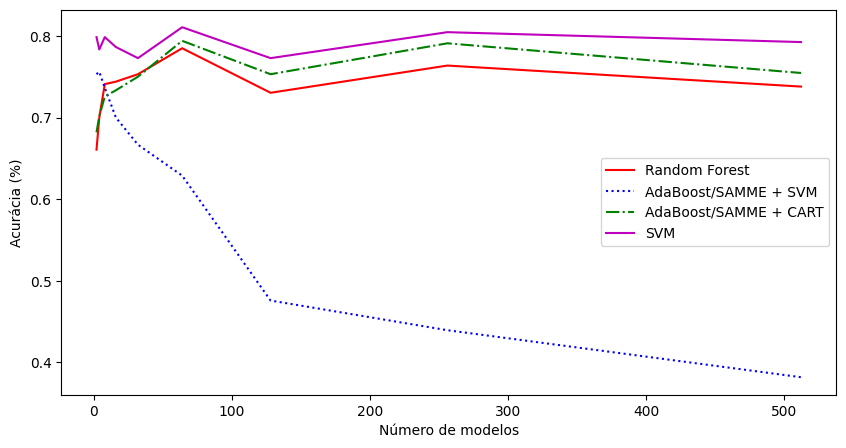

In [34]:
fig = plt.figure(figsize=(10,5))
plt.plot(n_estimadores, acuraciasRandomForest, 'r-', label='Random Forest')
plt.plot(n_estimadores, acuraciasAdaBoost_SVM, 'b:', label='AdaBoost/SAMME + SVM')
plt.plot(n_estimadores, acuraciasAdaBoost_CART, 'g-.', label='AdaBoost/SAMME + CART')
plt.plot(n_estimadores, acuraciasSVM, 'm-', label='SVM')
plt.xlabel("Número de modelos")
plt.ylabel("Acurácia (%)")
plt.legend()
plt.show()